## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Arina Churikova' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
!pip install pandas
!pip install sktime
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

     |████████████████████████████████| 5.7MB 11.1MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 9.5MB 40.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW_AC.csv', delimiter=",")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       sales  month  day  year
0    134.710     10   31  2020
1    137.740      7   31  2020
2    134.620      4   30  2020
3    141.670      1   31  2020
4    127.990     10   31  2019
..       ...    ...  ...   ...
142    1.656      4   30  1985
143    2.074      1   31  1985
144    1.584     10   31  1984
145    1.508      7   31  1984
146    1.235      4   30  1984

[147 rows x 4 columns]


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [5]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [6]:
# answer (0.5 pt.)
print(df.isna().sum())

sales    0
month    0
day      0
year     0
dtype: int64


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [7]:
# answer (0.5 pt.)
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [8]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
print(df)

       sales  month  day  year       date
0    134.710     10   31  2020 2020-10-31
1    137.740      7   31  2020 2020-07-31
2    134.620      4   30  2020 2020-04-30
3    141.670      1   31  2020 2020-01-31
4    127.990     10   31  2019 2019-10-31
..       ...    ...  ...   ...        ...
142    1.656      4   30  1985 1985-04-30
143    2.074      1   31  1985 1985-01-31
144    1.584     10   31  1984 1984-10-31
145    1.508      7   31  1984 1984-07-31
146    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


Change index to dates:

``` df.index=.... ```

In [9]:
# code here (0.25 pt.)
df.index=pd.to_datetime(df.date)
print(df)

              sales  month  day  year       date
date                                            
2020-10-31  134.710     10   31  2020 2020-10-31
2020-07-31  137.740      7   31  2020 2020-07-31
2020-04-30  134.620      4   30  2020 2020-04-30
2020-01-31  141.670      1   31  2020 2020-01-31
2019-10-31  127.990     10   31  2019 2019-10-31
...             ...    ...  ...   ...        ...
1985-04-30    1.656      4   30  1985 1985-04-30
1985-01-31    2.074      1   31  1985 1985-01-31
1984-10-31    1.584     10   31  1984 1984-10-31
1984-07-31    1.508      7   31  1984 1984-07-31
1984-04-30    1.235      4   30  1984 1984-04-30

[147 rows x 5 columns]


What is the size of the dataset?

use ```.shape```

In [10]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [11]:
df=df.drop(['day','year','month','date'], axis=1)
print(df)

              sales
date               
2020-10-31  134.710
2020-07-31  137.740
2020-04-30  134.620
2020-01-31  141.670
2019-10-31  127.990
...             ...
1985-04-30    1.656
1985-01-31    2.074
1984-10-31    1.584
1984-07-31    1.508
1984-04-30    1.235

[147 rows x 1 columns]


What is the size of the dataset now?

In [12]:
# code here (0.25 pt.)
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [14]:
# code here (0.25 pt.)
y=df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [15]:
# code here (0.25 pt.)
y=np.flip(y)
print(y)

date
1984-04-30      1.235
1984-07-31      1.508
1984-10-31      1.584
1985-01-31      2.074
1985-04-30      1.656
               ...   
2019-10-31    127.990
2020-01-31    141.670
2020-04-30    134.620
2020-07-31    137.740
2020-10-31    134.710
Name: sales, Length: 147, dtype: float64


Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecfba3dac8>)

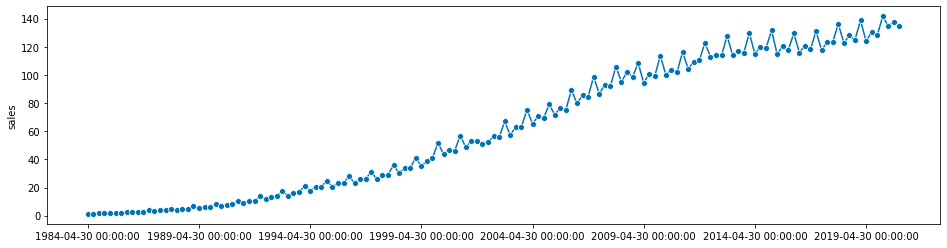

In [16]:
# code here (0.25 pt.)
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [17]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y,test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecfb9ba2b0>)

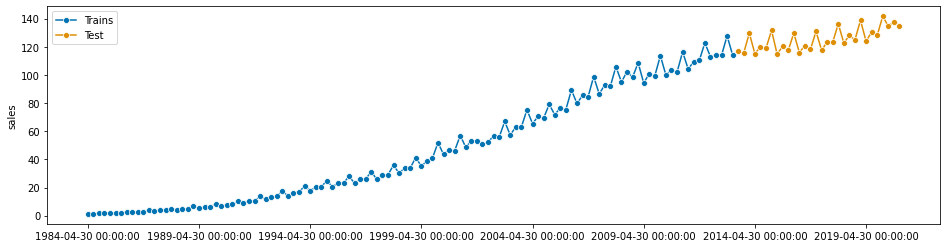

In [18]:
# code here (0.25 pt.)
plot_series(y_train, y_test, labels=['Trains','Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [19]:
# code here (0.5 pt.)
model_MAA=ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()
print(fit_MAA.summary())

                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                  117
Model:                       ETS(MAA)   Log Likelihood                -177.074
Date:                Thu, 11 Feb 2021   AIC                            374.147
Time:                        17:49:04   BIC                            401.769
Sample:                    04-30-1984   HQIC                           385.361
                         - 04-30-2013   Scale                            0.002
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.3363      0.080      4.186      0.000       0.179       0.494
smoothing_trend        0.1333      0.035      3.864      0.000       0.066       0.201
smoothing_seasonal  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [20]:
# code here (0.5 pt.)
model_AAM=ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()
print(fit_AAM.summary())

                                 ETS Results                                  
Dep. Variable:                  sales   No. Observations:                  117
Model:                       ETS(AAM)   Log Likelihood                -241.169
Date:                Thu, 11 Feb 2021   AIC                            502.338
Time:                        17:49:14   BIC                            529.960
Sample:                    04-30-1984   HQIC                           513.552
                         - 04-30-2013   Scale                            3.613
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.5436      0.107      5.077      0.000       0.334       0.753
smoothing_trend        0.0429      0.020      2.098      0.036       0.003       0.083
smoothing_seasonal  

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [21]:
# code here (0.25 pt.)
fit_MAA.forecast(steps=30)

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725437
2014-04-30    117.901781
2014-07-31    121.230478
2014-10-31    120.746279
2015-01-31    134.107045
2015-04-30    121.283388
2015-07-31    124.612085
2015-10-31    124.127886
2016-01-31    137.488652
2016-04-30    124.664996
2016-07-31    127.993693
2016-10-31    127.509494
2017-01-31    140.870260
2017-04-30    128.046603
2017-07-31    131.375301
2017-10-31    130.891102
2018-01-31    144.251867
2018-04-30    131.428211
2018-07-31    134.756908
2018-10-31    134.272709
2019-01-31    147.633475
2019-04-30    134.809819
2019-07-31    138.138516
2019-10-31    137.654317
2020-01-31    151.015082
2020-04-30    138.191426
2020-07-31    141.520123
2020-10-31    141.035924
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [22]:
# code here (0.25 pt.)
fit_AAM.forecast(steps=30)

2013-07-31    119.244422
2013-10-31    117.867103
2014-01-31    133.457352
2014-04-30    118.815393
2014-07-31    124.107317
2014-10-31    122.625318
2015-01-31    138.791105
2015-04-30    123.516990
2015-07-31    128.970212
2015-10-31    127.383534
2016-01-31    144.124858
2016-04-30    128.218587
2016-07-31    133.833106
2016-10-31    132.141749
2017-01-31    149.458611
2017-04-30    132.920184
2017-07-31    138.696001
2017-10-31    136.899964
2018-01-31    154.792364
2018-04-30    137.621780
2018-07-31    143.558895
2018-10-31    141.658179
2019-01-31    160.126117
2019-04-30    142.323377
2019-07-31    148.421790
2019-10-31    146.416394
2020-01-31    165.459870
2020-04-30    147.024974
2020-07-31    153.284684
2020-10-31    151.174609
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecf9e27828>)

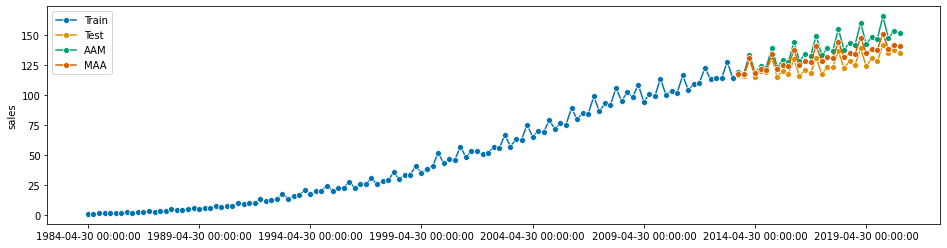

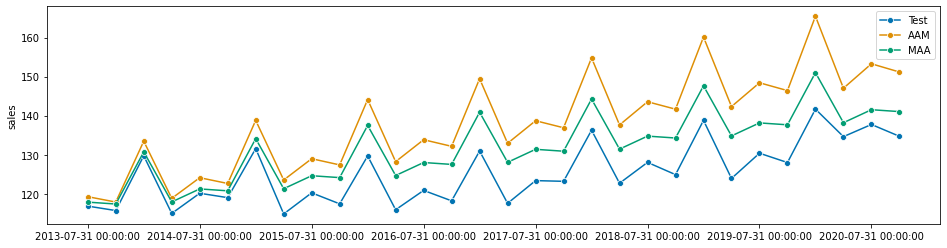

In [23]:
# code here (0.5 pt.)
plot_series(y_train, y_test, fit_AAM.forecast(steps=30), fit_MAA.forecast(steps=30), labels=['Train', 'Test','AAM','MAA'])
plot_series(y_test, fit_AAM.forecast(steps=30), fit_MAA.forecast(steps=30), labels=['Test','AAM','MAA'])

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [24]:
# code here (0.5 pt.)
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
lower_int=pred_MAA.pi_lower
upper_int=pred_MAA.pi_upper
print(lower_int,upper_int)

2013-07-31    107.650653
2013-10-31    107.016970
2014-01-31    117.458301
2014-04-30    103.822347
2014-07-31    101.355167
2014-10-31     97.497021
2015-01-31    108.940670
2015-04-30     93.075093
2015-07-31     90.051554
2015-10-31     86.783153
2016-01-31     96.991631
2016-04-30     81.428146
2016-07-31     77.577916
2016-10-31     72.667411
2017-01-31     81.196642
2017-04-30     66.392136
2017-07-31     62.074075
2017-10-31     56.787774
2018-01-31     65.974025
2018-04-30     49.230357
2018-07-31     45.228304
2018-10-31     40.013601
2019-01-31     49.394422
2019-04-30     34.770252
2019-07-31     24.451085
2019-10-31     23.679236
2020-01-31     32.227160
2020-04-30     14.948165
2020-07-31      7.245227
2020-10-31      6.443948
Freq: Q-OCT, Name: pi_lower, dtype: float64 2013-07-31    127.828293
2013-10-31    128.393570
2014-01-31    144.488879
2014-04-30    133.562064
2014-07-31    142.201429
2014-10-31    143.672832
2015-01-31    160.711107
2015-04-30    150.802447
2015-0

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecf9ee0f60>)

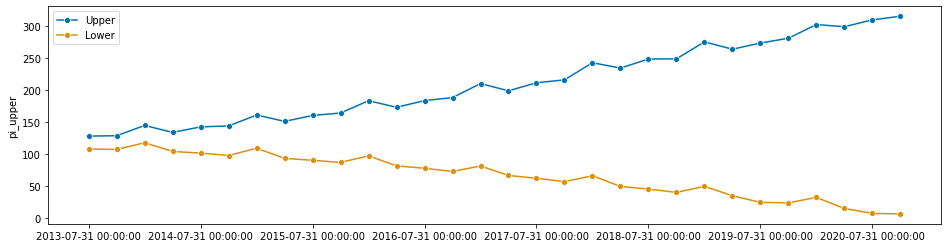

In [25]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int, labels=['Upper','Lower'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [26]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
lower_int=pred_AAM.pi_lower
upper_int=pred_AAM.pi_upper
print(lower_int,upper_int)

2013-07-31    115.485301
2013-10-31    113.383970
2014-01-31    128.227110
2014-04-30    113.387458
2014-07-31    117.906153
2014-10-31    115.501787
2015-01-31    130.777952
2015-04-30    115.735200
2015-07-31    119.928211
2015-10-31    118.233398
2016-01-31    134.080215
2016-04-30    117.968704
2016-07-31    122.357781
2016-10-31    120.705025
2017-01-31    135.969991
2017-04-30    119.766796
2017-07-31    124.317271
2017-10-31    121.496662
2018-01-31    138.006497
2018-04-30    121.436302
2018-07-31    125.556721
2018-10-31    123.937546
2019-01-31    138.823664
2019-04-30    122.989130
2019-07-31    127.538686
2019-10-31    124.875689
2020-01-31    141.287942
2020-04-30    124.815799
2020-07-31    129.154059
2020-10-31    126.570238
Freq: Q-OCT, Name: pi_lower, dtype: float64 2013-07-31    123.138881
2013-10-31    122.312800
2014-01-31    138.532367
2014-04-30    123.982912
2014-07-31    130.502878
2014-10-31    129.319092
2015-01-31    146.917438
2015-04-30    131.534252
2015-0

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fecf9dd5278>)

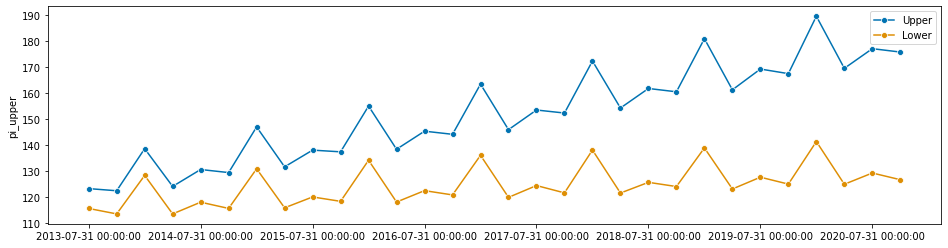

In [27]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int, labels=['Upper','Lower'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [28]:
# code here (0.5 pt.)
mean_absolute_error(y_test, fit_MAA.forecast(steps=30))

6.394546605755498

In [29]:
# code here (0.5 pt.) AAM
mean_absolute_error(y_test, fit_AAM.forecast(steps=30))

12.709161383337841

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [30]:
# code here (0.5 pt.) MAA
mean_squared_error(y_test, fit_MAA.forecast(steps=30))

50.57147037477893

In [31]:
# code here (0.5 pt.) AAM
mean_squared_error(y_test, fit_AAM.forecast(steps=30))

195.9700976122845

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [32]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [33]:
# code here (0.25 pt.) MAA
mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30))

5.091701024681435

In [34]:
# code here (0.25 pt.) AAM
mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30))

9.993524328604307

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [35]:
# code here (1 pt.)
print('MAA')

MAA
